In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import os

In [3]:
DATA_PATH = '../processed/goodreads.json'

In [4]:
df = pd.read_json(DATA_PATH)

In [5]:
df['nQuotes'] = df['quotes'].apply(lambda x: len(x))
df.head()

,title,author,rating,ISBN,genres,pageCount,url,quotes,nQuotes
0,Pretty Little Liars,Sara Shepard,3.86,9.780061e+12,"[Young Adult, Mystery, Contemporary, Fiction, ...",286.0,https://www.goodreads.com/book/show/162085.Pre...,"[{'text': '“I'm still here, bitches. And I kno...",34
1,Ringworld,Larry Niven,3.95,9.780575e+12,"[Science Fiction, Fiction, Science Fiction Fan...",288.0,https://www.goodreads.com/book/show/61179.Ring...,[{'text': '“The gods do not protect fools. Foo...,51
2,Lover Enshrined,J.R. Ward,4.11,9.780451e+12,"[Romance, Paranormal, Paranormal Romance, Vamp...",560.0,https://www.goodreads.com/book/show/1240662.Lo...,"[{'text': '“After a moment, Wrath turned to Jo...",77
3,Blood Red Road,Moira Young,3.91,9.781442e+12,"[Young Adult, Dystopia, Fantasy, Romance, Scie...",459.0,https://www.goodreads.com/book/show/9917938-bl...,"[{'text': '“Yer in my blood, Saba, he says. Ye...",58
4,"Eragon, Eldest & Brisingr",Christopher Paolini,4.24,9.780376e+12,"[Fantasy, Young Adult, Fiction, Dragons, Magic...",1952.0,https://www.goodreads.com/book/show/2479827.Er...,"[{'text': '“Ah, pay no heed if your enemies la...",15


In [6]:
df.describe()

,rating,ISBN,pageCount,nQuotes
count,9158.000000,7.795000e+03,9100.000000,9158.000000
mean,4.046705,9.760507e+12,389.511319,93.414719
std,0.253178,4.032841e+11,273.530262,167.598444
min,0.000000,3.454834e+07,1.000000,1.000000
25%,3.890000,9.780316e+12,266.000000,13.000000
50%,4.060000,9.780553e+12,351.000000,37.000000
75%,4.220000,9.781400e+12,448.000000,99.000000
max,5.000000,9.798987e+12,8258.000000,1500.000000


In [7]:
genre_df = pd.DataFrame(pd.Series(genre for genres_list in df['genres'] for genre in genres_list).value_counts()).rename(columns={0: 'count'})
genre_df = genre_df.reset_index().rename(columns={'index': 'genre'})
genre_df.head()

,genre,count
0,Fiction,6866
1,Fantasy,3646
2,Romance,3007
3,Young Adult,2956
4,Classics,2061


In [8]:
quote_df = pd.DataFrame(pd.Series(quote for quote_list in df['quotes'] for quote in quote_list)).rename(columns={0:'json'})
quote_df['text'] = quote_df['json'].map(lambda x : x['text'])
quote_df['likes'] = quote_df['json'].map(lambda x : x['likes'])
quote_df['tags'] = quote_df['json'].map(lambda x : x['tags'])
quote_df = quote_df.drop('json', axis=1)
quote_df.head()

,text,likes,tags
0,"“I'm still here, bitches. And I know everythin...",1053,[defiance]
1,“You know what they say about hope. It breeds ...,294,[spencer]
2,"“I kind of have to go to the bathroom,"" Aria s...",201,"[humour, lust]"
3,“Only two can keep a secret if one of them is ...,196,[]
4,“When someone covets something they desire and...,148,[]


In [9]:
tag_df = pd.DataFrame(pd.Series(tag for tags_list in quote_df['tags'] for tag in tags_list).value_counts()).rename(columns={0: 'count'})
tag_df = tag_df.reset_index().rename(columns={'index': 'tag'})
tag_df.head()

,tag,count
0,love,15298
1,humor,10295
2,life,8056
3,inspirational,5596
4,death,4136


In [10]:
author_df = df.groupby(['ISBN']) \
                .count() \
                .drop(['author', 'title', 'rating', 'genres', 'pageCount', 'quotes'], axis=1) \
                .rename(columns={'url': 'nURL'}) \
                .sort_values(by='nURL', ascending=False)
author_df.head(10)

,nURL,nQuotes
ISBN,,
3.454834e+07,1,1
9.780805e+12,1,1
9.780807e+12,1,1
9.780806e+12,1,1
9.780805e+12,1,1
9.780805e+12,1,1
9.780805e+12,1,1
9.780805e+12,1,1
9.780805e+12,1,1


# Data Characterization

## Volume

In [11]:
data = [
    ["Raw data size", f"{os.path.getsize('../data/goodreads.json') >> 20} MB"],
    ["Processed data size", f"{os.path.getsize(DATA_PATH) >> 20} MB"],
    ["Total number of books", f"{df['title'].count()} books"],
    ["Total number of quotes", f"{df['nQuotes'].sum()} quotes"],
    ["Average number of quotes per book", f"{df['nQuotes'].mean():.2f} quotes"],
    ["Median number of quotes per book", f"{int(df['nQuotes'].median())} quotes"],
    ["Number of genres", f"{len(genre_df['genre'].unique())} unique genres"],
    ["Number of tags", f"{len(tag_df['tag'].unique())} unique tags"]
]

volume_df = pd.DataFrame(data, columns=['Attribute', 'Value'])
volume_df = volume_df.set_index('Attribute')
#print(volume_df.style.to_latex())
volume_df.head(10)

,Value
Attribute,
Raw data size,344 MB
Processed data size,298 MB
Total number of books,9158 books
Total number of quotes,855492 quotes
Average number of quotes per book,93.41 quotes
Median number of quotes per book,37 quotes
Number of genres,544 unique genres
Number of tags,74071 unique tags


## Statistics

Text(0.5, 1.0, 'Rating distribution')

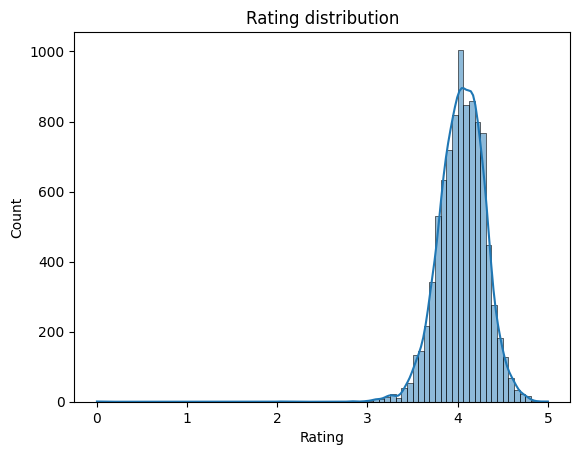

In [12]:
sns.histplot(df, x="rating", bins=80, kde=True)
plt.xlabel("Rating")
plt.title("Rating distribution")

In [13]:
author_df = df.groupby(['author']) \
                .agg({'title': 'count', 'rating': 'mean'}) \
                .rename(columns={'title': 'nBooks', 'rating': 'avgRating'}) \
                .sort_values('nBooks', ascending=False)
print(author_df.head(5).style.to_latex())
author_df.head(5)

\begin{tabular}{lrr}
 & nBooks & avgRating \\
author &  &  \\
Stephen King & 63 & 4.020794 \\
Terry Pratchett & 40 & 4.159250 \\
William Shakespeare & 36 & 3.766111 \\
James Patterson & 36 & 3.951667 \\
Rick Riordan & 34 & 4.305000 \\
\end{tabular}



,nBooks,avgRating
author,,
Stephen King,63,4.020794
Terry Pratchett,40,4.159250
William Shakespeare,36,3.766111
James Patterson,36,3.951667
Rick Riordan,34,4.305000


In [14]:
author_df.describe()

,nBooks,avgRating
count,4028.000000,4028.000000
mean,2.273585,4.021275
std,3.217800,0.242400
min,1.000000,2.040000
25%,1.000000,3.870000
50%,1.000000,4.030000
75%,2.000000,4.186667
max,63.000000,4.890000


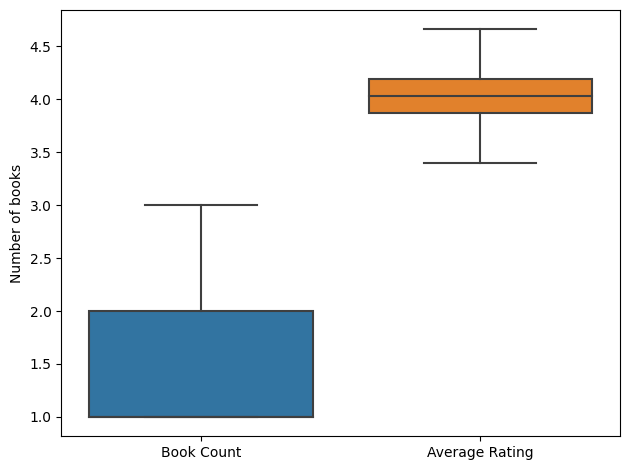

In [15]:
sns.boxplot(author_df.rename(columns={'nBooks': 'Book Count', 'avgRating': 'Average Rating'}), showfliers=False)
plt.ylabel('Number of books')
plt.tight_layout()
plt.savefig('bookAndRatingDistribution.png')

In [32]:
genre_df.describe()

,count
count,544.000000
mean,116.408088
std,437.004953
min,1.000000
25%,2.000000
50%,10.000000
75%,57.000000
max,6866.000000


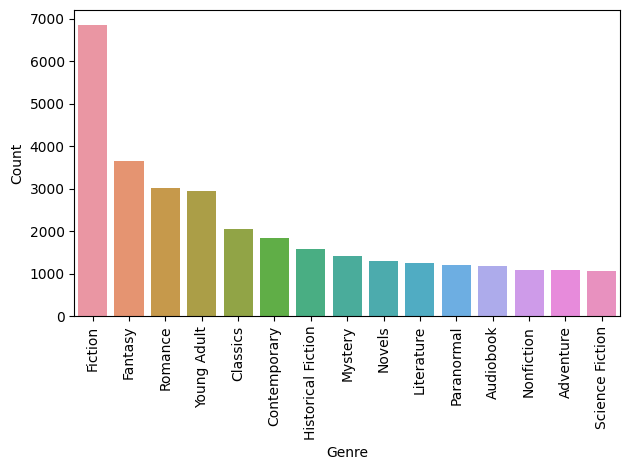

In [33]:
sns.barplot(data=genre_df.reset_index().head(15), x='genre', y='count')
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('genre_count.png')

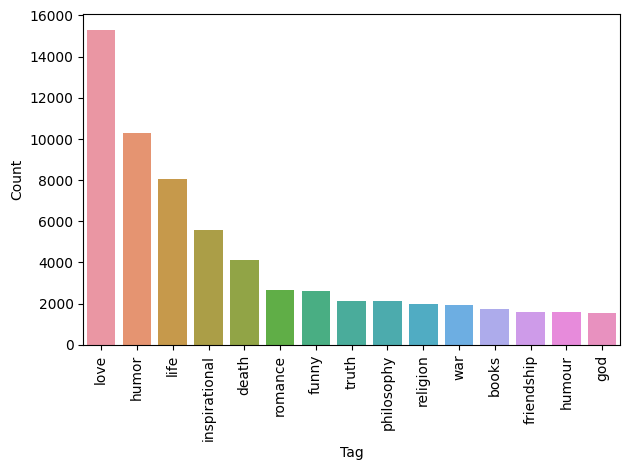

In [34]:
sns.barplot(data=tag_df.reset_index().head(15), x='tag', y='count')
plt.xticks(rotation = 90)
plt.xlabel('Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('tag_count.png')

<AxesSubplot:xlabel='count', ylabel='Count'>

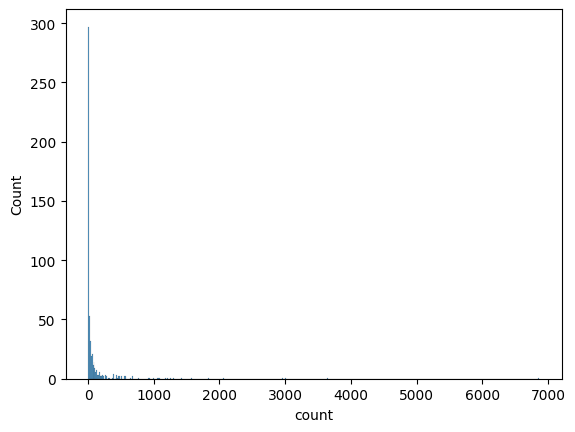

In [35]:
sns.histplot(genre_df, x="count")

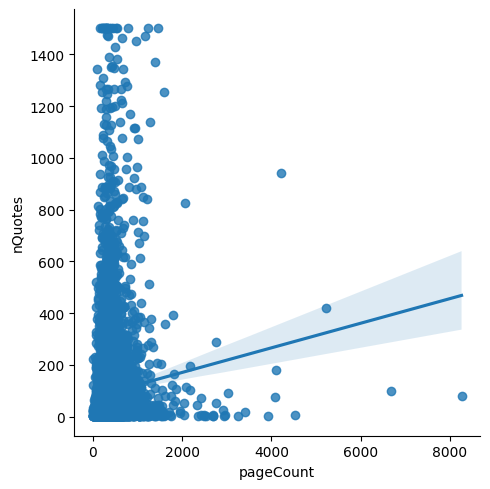

In [36]:
sns.lmplot(data=df, x='pageCount', y='nQuotes')

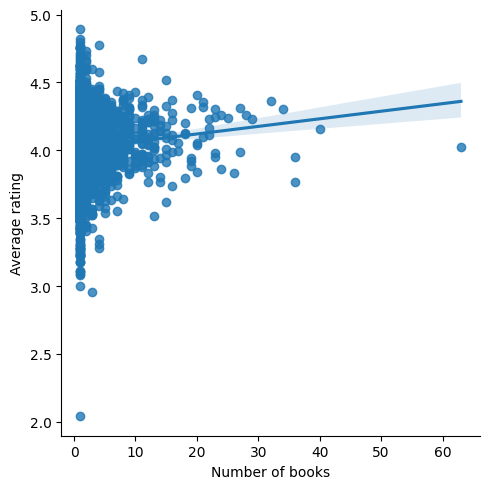

In [48]:
sns.lmplot(data=author_df, x='nBooks', y='avgRating')
plt.ylabel('Average rating')
plt.xlabel('Number of books')
plt.savefig('nBooks_over_avgRating.png')